In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report




# Data Preprocessing

In [63]:
df=pd.read_csv("C:/Users/sachi/Downloads/Fraud.csv")

In [64]:
df.shape

(6362620, 11)

In [65]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [67]:
df.isna().sum()  #checking missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [68]:
df.isnull().values.any() #there is no missing values

False

In [69]:
df.drop(labels=['nameOrig','nameDest'], axis=1,inplace=True) #dropping unwanted columns

In [70]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0


In [71]:
print((df['amount']<0).sum()) # checking whether transactions with transaction amount is negative exist or not

0


# Exploratory Data Analysis

In [72]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [73]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [74]:
df.describe(include='object')

,type
count,6362620
unique,5
top,CASH_OUT
freq,2237500


In [75]:
df.nunique()

step                  743
type                    5
amount            5316900
oldbalanceOrg     1845844
newbalanceOrig    2682586
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [76]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [77]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [78]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


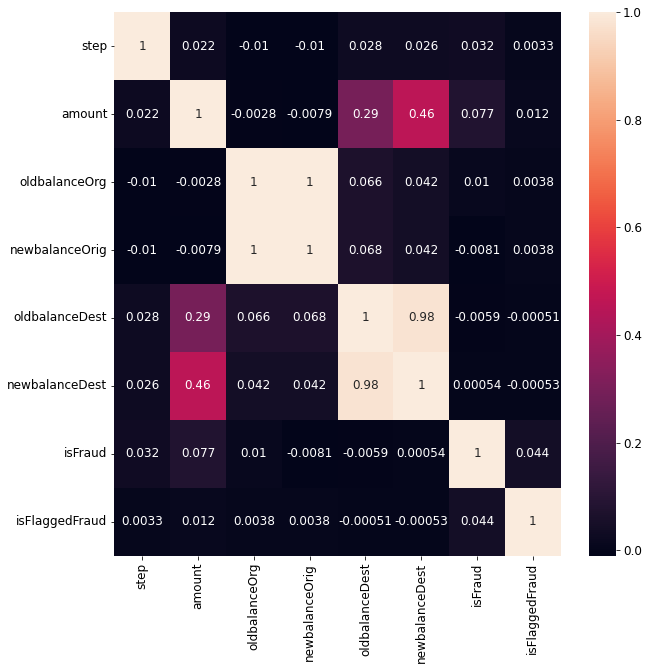

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [80]:
#vif for multicollinearity
X = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
        # VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
        

          feature    VIF
0            step   1.19
1          amount   4.01
2   oldbalanceOrg 465.12
3  newbalanceOrig 466.91
4  oldbalanceDest  71.79
5  newbalanceDest  83.26
6  isFlaggedFraud   1.00


In [81]:
df['error_org']=df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['error_dest']=df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [82]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,error_org,error_dest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,21182.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00


In [83]:
df.drop(labels=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)

In [84]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud,error_org,error_dest
0,1,PAYMENT,9839.64,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,0,0,1864.28,0.00
2,1,TRANSFER,181.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,1,0,181.00,21182.00
4,1,PAYMENT,11668.14,0,0,11668.14,0.00


In [85]:
print((df['amount']==0).sum()) #number of transactions with transaction amount is zero
print(df[df.amount==0]['type'].value_counts().index[0])
print(df[df.amount==0]['isFraud'].value_counts().index[0])

16
CASH_OUT
1


In [86]:
print((df['isFlaggedFraud']==1).sum()) #number of transactions flagged as fraudulent
print(df[df.isFlaggedFraud==1]['type'].value_counts().index[0])
print(df[df.isFlaggedFraud==1]['isFraud'].value_counts().index[0])
print(df[df.isFlaggedFraud==1].amount.min())
print(df[df.isFlaggedFraud==1].amount.max())


16
TRANSFER
1
353874.22
10000000.0


16 transactions were correctly flagged as fradulent and belongs to tranfer type trasaction.Also minimum amount of these transaction is 353874.22 and maximum is 100,00000.
Analysing the data it is clear that, isFlaggedFraud is not relavant for model building.Hence it can be dropped.

In [87]:
df.drop(labels=['isFlaggedFraud'], axis=1,inplace=True) #dropping unwanted columns

In [88]:
df.head()

,step,type,amount,isFraud,error_org,error_dest
0,1,PAYMENT,9839.64,0,9839.64,0.00
1,1,PAYMENT,1864.28,0,1864.28,0.00
2,1,TRANSFER,181.00,1,181.00,0.00
3,1,CASH_OUT,181.00,1,181.00,21182.00
4,1,PAYMENT,11668.14,0,11668.14,0.00


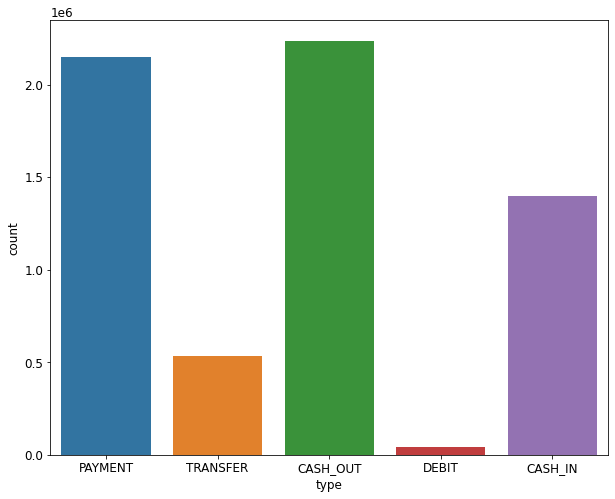

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='type')
plt.show()

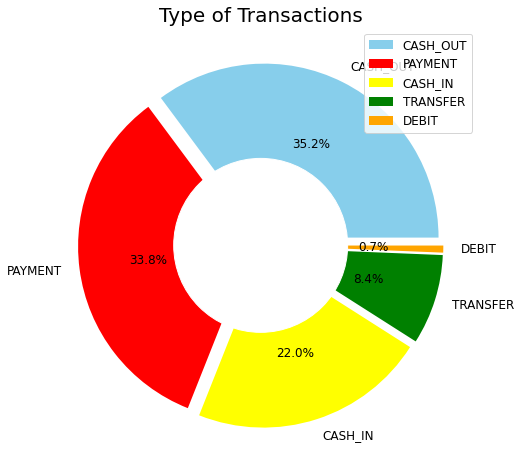

In [90]:
type_trans = df["type"].value_counts()
labels = type_trans.index
quantity = type_trans.values
explode = (0.05, 0.05, 0.05,0.05,0.05)
custom_colors =['#87CEEB','#FF0000', '#FFFF00','#008000','#FFA500']
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=labels, colors=custom_colors,autopct='%1.1f%%',explode=explode)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Type of Transactions", fontsize=20)
plt.legend(labels, loc="upper right")
plt.show()

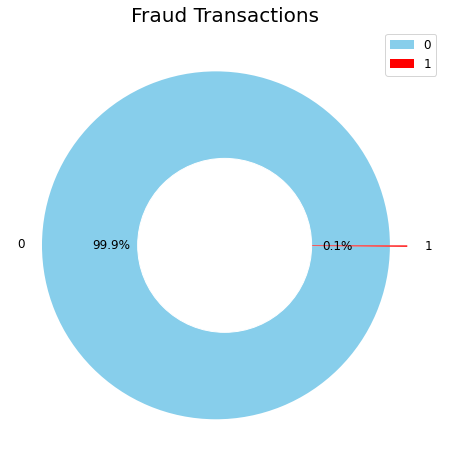

In [91]:
fraud_trans = df["isFraud"].value_counts()
labels =fraud_trans.index
quantity = fraud_trans.values
explode = (0.05, 0.05)
custom_colors =['#87CEEB','#FF0000', '#FFFF00','#008000','#FFA500']
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=labels, colors=custom_colors,autopct='%1.1f%%',explode=explode)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Fraud Transactions", fontsize=20)
plt.legend(labels, loc="upper right")
plt.show()

The chart indicates that there is an imbalance in data.Thus data should be resampled

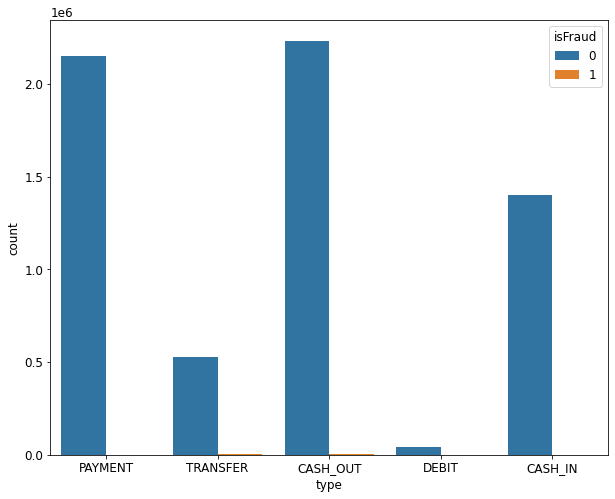

In [92]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='type',hue='isFraud')
plt.show()

In [93]:
df.groupby(['type','isFraud'])['isFraud'].count().unstack() #finding the number of fraud transactions in different categories 

isFraud,0,1
type,,
CASH_IN,1399284.00,NaN
CASH_OUT,2233384.00,4116.00
DEBIT,41432.00,NaN
PAYMENT,2151495.00,NaN
TRANSFER,528812.00,4097.00


Fraud transactins belongs to only CASH_OUT and TRANSFER type .Thus no need to consider other types

In [94]:
df = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT']))]
df.head()

,step,type,amount,isFraud,error_org,error_dest
2,1,TRANSFER,181.00,1,181.00,0.00
3,1,CASH_OUT,181.00,1,181.00,21182.00
15,1,CASH_OUT,229133.94,0,15325.00,-46430.44
19,1,TRANSFER,215310.30,0,705.00,22425.00
24,1,TRANSFER,311685.89,0,10835.00,-2712905.89


In [95]:
# Converting the labels into integer values
le = LabelEncoder() 
df['type']= le.fit_transform(df['type'].astype(str))

In [96]:
le.inverse_transform([0,1]) # Finding the labels corresponding to the integer values (in labels)

array(['CASH_OUT', 'TRANSFER'], dtype=object)

In [97]:
df.head()

,step,type,amount,isFraud,error_org,error_dest
2,1,1,181.00,1,181.00,0.00
3,1,0,181.00,1,181.00,21182.00
15,1,0,229133.94,0,15325.00,-46430.44
19,1,1,215310.30,0,705.00,22425.00
24,1,1,311685.89,0,10835.00,-2712905.89


# Model Building

In [98]:
df = df.sample(frac =.50,random_state=31,axis=0,ignore_index=True) #sample generated is 50% of data frame (for model building)

In [99]:
df['isFraud'].value_counts()

0    1381120
1       4084
Name: isFraud, dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385204 entries, 0 to 1385203
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   step        1385204 non-null  int64  
 1   type        1385204 non-null  int32  
 2   amount      1385204 non-null  float64
 3   isFraud     1385204 non-null  int64  
 4   error_org   1385204 non-null  float64
 5   error_dest  1385204 non-null  float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 58.1 MB


In [101]:
X=df.drop(labels=['isFraud'], axis=1)
Y=df['isFraud']

In [102]:
%%time
# Splitting the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 132)
# Printing the size of the train data, train label, test data and test label
print("Shape train data = ",np.shape(X_train))
print("Shape of train label = ",np.shape(y_train))
print("Shape of test data = ",np.shape(X_test))
print("Shape of test label = ",np.shape(y_test))

Shape train data =  (1108163, 5)
Shape of train label =  (1108163,)
Shape of test data =  (277041, 5)
Shape of test label =  (277041,)
CPU times: total: 188 ms
Wall time: 183 ms


In [103]:
print(f'Original dataset shape : {Counter(y_train)}')

Original dataset shape : Counter({0: 1104876, 1: 3287})


In [104]:
%%time            
smote = SMOTE(random_state=51) #SMOTE over sampling is used to balance the data
X_res,y_res=smote.fit_resample(X_train, y_train)

print(f'Resampled dataset shape {Counter(y_res)}')

Resampled dataset shape Counter({0: 1104876, 1: 1104876})
CPU times: total: 703 ms
Wall time: 697 ms


1.Random Forest

In [105]:
%%time
RF = RandomForestClassifier(random_state=0) # Initializing the classifier
RF.fit(X_res, y_res) 
RF_pred=RF.predict(X_test)
joblib.dump(RF,"RF1.pkl")
accuracy1 = accuracy_score(y_test, RF_pred)
precision = precision_score(y_test, RF_pred, average='macro')
recall = recall_score(y_test, RF_pred, average='macro')
f1 = f1_score(y_test, RF_pred, average='macro')

print('Accuracy of RF = ','%.2f'%(accuracy1*100))
print('Precision of RF = ','%.4f'%(precision))
print('Recall of RF= ','%.4f'%(recall))
print('F1-score of RF= ','%.4f'%(f1))


Accuracy of RF =  98.33
Precision of RF =  0.5644
Recall of RF=  0.9122
F1-score of RF=  0.6078
CPU times: total: 10min 43s
Wall time: 10min 51s


In [106]:
result1= classification_report(y_test, RF_pred)
print(result1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    276244
           1       0.13      0.84      0.22       797

    accuracy                           0.98    277041
   macro avg       0.56      0.91      0.61    277041
weighted avg       1.00      0.98      0.99    277041



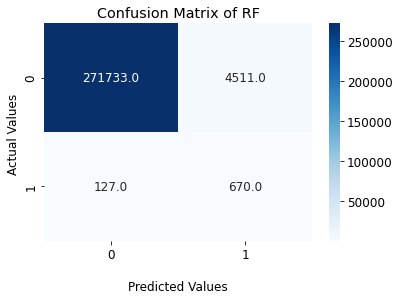

In [107]:
cm1= confusion_matrix(y_test,RF_pred)
ax = sns.heatmap(cm1, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of RF');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()

2.KNN 

In [108]:
%%time
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_res, y_res)
knn_pred=knn.predict(X_test)
accuracy2= accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='macro')
recall = recall_score(y_test, knn_pred, average='macro')
f1 = f1_score(y_test, knn_pred, average='macro')

print('Accuracy of KNN= ','%.2f'%(accuracy2*100))
print('Precision of KNN = ','%.4f'%(precision))
print('Recall of KNN= ','%.4f'%(recall))
print('F1-score of KNN= ','%.4f'%(f1))

Accuracy of KNN=  96.74
Precision of KNN =  0.5359
Recall of KNN=  0.9186
F1-score of KNN=  0.5583
CPU times: total: 17.7 s
Wall time: 17.9 s


In [109]:
result2= classification_report(y_test, knn_pred)
print(result2)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    276244
           1       0.07      0.87      0.13       797

    accuracy                           0.97    277041
   macro avg       0.54      0.92      0.56    277041
weighted avg       1.00      0.97      0.98    277041



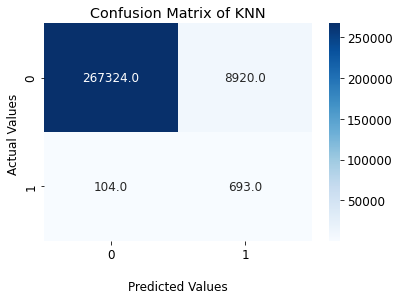

In [110]:
cm2= confusion_matrix(y_test,knn_pred)
ax = sns.heatmap(cm2, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of KNN');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()

3.SVM

In [111]:
%%time
svm = LinearSVC()
svm.fit(X_res, y_res)
svm_pred = svm.predict(X_test)
joblib.dump(svm,"svm1.pkl")
accuracy3 = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='macro')
recall = recall_score(y_test, svm_pred, average='macro')
f1 = f1_score(y_test, svm_pred, average='macro')

print('Accuracy of SVM = ','%.2f'%(accuracy3*100))
print('Precision of SVM= ','%.4f'%(precision))
print('Recall = ','%.4f'%(recall))
print('F1-score = ','%.4f'%(f1))


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of SVM =  89.68
Precision of SVM=  0.5133
Recall =  0.9389
F1-score =  0.4987
CPU times: total: 5min 33s
Wall time: 5min 38s


In [112]:
result3= classification_report(y_test, svm_pred)
print(result3)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    276244
           1       0.03      0.98      0.05       797

    accuracy                           0.90    277041
   macro avg       0.51      0.94      0.50    277041
weighted avg       1.00      0.90      0.94    277041



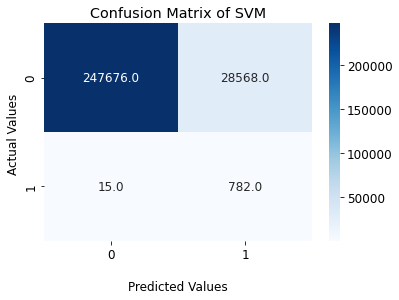

In [113]:
cm3= confusion_matrix(y_test,svm_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of SVM');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Display the visualization of the Confusion Matrix.
plt.show()

# Conclusion
